In [ ]:
#Emergent Non-Markovian Gain in Open Quantum Systems
#https://arxiv.org/pdf/2503.21739

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

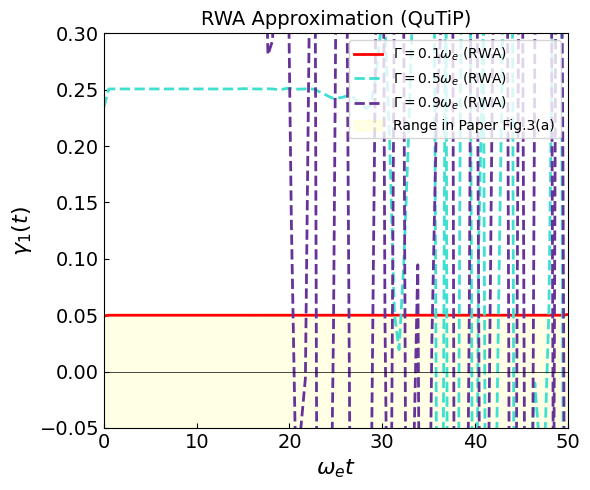

In [2]:
omega_e = 1.0
Delta = 0.5 * omega_e
gammas = [0.1, 0.5, 0.9]
colors = ['red', 'turquoise', 'rebeccapurple']
linestyles = ['-', '--', '--']
linewidths = [2.0, 2.0, 2.0]
tlist = np.linspace(0, 50,100)
plt.figure(figsize=(6, 5))

for i, Gamma_val in enumerate(gammas):
    G = Gamma_val * omega_e
    N = 10
    a = destroy(N)
    H = Delta * a.dag() * a
    c_ops = [np.sqrt(G) * a]
    psi0 = basis(N, 1) 
    result = mesolve(H, psi0, tlist, c_ops, e_ops=[a.dag() * a])
    n_t = result.expect[0]
    n_t = np.abs(n_t) + 1e-20
    u_abs = np.sqrt(n_t)
    du_dt = np.gradient(u_abs, tlist)
    gamma1 = - du_dt / u_abs

    plt.plot(tlist, gamma1, 
             color=colors[i], 
             linestyle=linestyles[i], 
             linewidth=linewidths[i],
             label=rf'$\Gamma={Gamma_val}\omega_e$ (RWA)')
plt.xlim(0, 50)
plt.ylim(-0.05, 0.3)

plt.axhspan(-0.05, 0.05, color='yellow', alpha=0.1, label='Range in Paper Fig.3(a)')
plt.axhline(0, color='black', linewidth=0.5)

plt.xlabel(r'$\omega_e t$', fontsize=16)
plt.ylabel(r'$\gamma_1(t)$', fontsize=16)
plt.tick_params(labelsize=14, direction='in')

plt.title("RWA Approximation (QuTiP)", fontsize=14)
plt.legend(fontsize=10, loc='upper right')
plt.tight_layout()
plt.show()